# THE OBJECTIVE: We want to see how legacy Financial News companies cover and report on Tesla and Elon musk. We want to find out if they are any different?

# We will see how many stories were published by them in the last three months and correlate them with the stock price. (I know correlation doesn't equal to casuation). 

Why Tesla ? I think Telsa is indeed very volatile company, whose stock prices rise and fall drastically depending on the media coverage and musk's tweets. The tweets are covered and reported by the news companies as well.

We will scarpe for Reuters: It's one of the largest news wire companies in the world and in many cases, they are the first ones to report on Tesla's management.

Wall street Journal: They have a huge readership who follow the stock market religiously.

Financial Times: They soley focus on the markets and have a huge influence on their readers.

We also scrape Tesla's stock data from NASDAQ. 

What are we looking for ?

# 1)Number of headlines published by each comapany on Musk and Telsa

2)visualizing the before and after price of the stock data after the news was published and looking for trends if any?

3)building a searchable database: where readers will input for date, and they would get the headlines published for that date and the price of the stock for that date.

*Points to add: graphing the telsa stock price for the last three months. 

# Scraping for Tesla headlines and Timestamp on Reuters.

# we get the Telsa news thorugh the search results and filter for one year. 

In [1]:
import requests
url = "https://www.reuters.com/search/news?blob=Tesla&sortBy=date&dateRange=pastYear"
response = requests.get(url)

In [2]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(response.text)

In [3]:
soup

<!--[if !IE]> App Server /produs--i-0ee9f9400efa5460a/ <![endif]--><!DOCTYPE html>
<html lang="en"><head>
<title>Search Results</title>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta charset="utf-8"/><meta content="on" http-equiv="x-dns-prefetch-control"/><link href="//s1.reutersmedia.net" rel="dns-prefetch"/><link href="//s2.reutersmedia.net" rel="dns-prefetch"/><link href="//s3.reutersmedia.net" rel="dns-prefetch"/><link href="//s4.reutersmedia.net" rel="dns-prefetch"/><link href="//static.reuters.com" rel="dns-prefetch"/><link href="//www.googletagservices.com" rel="dns-prefetch"/><link href="//www.googletagmanager.com" rel="dns-prefetch"/><link href="//www.google-analytics.com" rel="dns-prefetch"/><link href="//static.chartbeat.com" rel="dns-prefetch"/><meta content="INDEX, FOLLOW" name="robots"/>
<!-- Segment -->
<script>
  !function(){var analytics=window.analytics=window.analytics||[];if(!analytics.initialize)if(analytics.invoked)window.console&&console.error&&conso

In [4]:
headline1 = soup.find("div", class_="search-result-content").find('a')

In [6]:
headline1.text

'Exclusive-To tap U.S. government billions, Tesla must unlock EV chargers'

In [7]:
time_stamp1 = soup.find("div", class_="search-result-content").find('h5')

In [8]:
time_stamp1.text

'February 10, 2023 06:33pm EST'

In [13]:
lede1 = soup.find("div", class_="search-result-content").find('excerpt')

In [15]:
print(lede1)

None


In [16]:
first = soup.find("div", class_="search-result-content")

In [17]:
first.text

'\nExclusive-To tap U.S. government billions, Tesla must unlock EV chargers\n...By Jarrett Renshaw and Hyunjoo Jin\n(Reuters) -Tesla CEO Elon Musk has... that will pressure Tesla to expand beyond its proprietary charging equipment...\nFebruary 10, 2023 06:33pm EST\n'

In [26]:
text = 'Exclusive-To tap U.S. government billions, Tesla must unlock EV chargers\n...By Jarrett Renshaw and Hyunjoo Jin\n(Reuters) -Tesla CEO Elon Musk has... that will pressure Tesla to expand beyond its proprietary charging equipment...\nFebruary 10, 2023 06:33pm EST\n'

lines = text.split("\n")
headline = lines[0]
lede = lines[2].split("-")[1]
timestamp = lines[3]

print("Headline:", headline)
print("Lede:", lede)
print("Timestamp:", timestamp)


Headline: Exclusive-To tap U.S. government billions, Tesla must unlock EV chargers
Lede: Tesla CEO Elon Musk has... that will pressure Tesla to expand beyond its proprietary charging equipment...
Timestamp: February 10, 2023 06:33pm EST


In [24]:
text = 'Exclusive-To tap U.S. government billions, Tesla must unlock EV chargers\n...By Jarrett Renshaw and Hyunjoo Jin\n(Reuters) -Tesla CEO Elon Musk has... that will pressure Tesla to expand beyond its proprietary charging equipment...\nFebruary 10, 2023 06:33pm EST\n'

headline, lede, timestamp = text.split('\n')[0], text.split('\n')[2], text.split('\n')[3]

print("Headline:", headline)
print("Lede:", lede)
print("Timestamp:", timestamp)


Headline: Exclusive-To tap U.S. government billions, Tesla must unlock EV chargers
Lede: (Reuters) -Tesla CEO Elon Musk has... that will pressure Tesla to expand beyond its proprietary charging equipment...
Timestamp: February 10, 2023 06:33pm EST


In [25]:
timestamp

'February 10, 2023 06:33pm EST'

In [50]:
# Find all the div tags with a class attribute of "search-result-content"
result_divs = soup.find_all("div", class_="search-result-content")

# Initialize an empty list to store the headlines
headlines = []

# Loop through the list of divs
for result_div in result_divs:
  # Find the first a tag within the div
  headline = result_div.find('a')
  # Extract the text content of the a tag
  headline_text = headline.text
  # Add the headline to the list
  headlines.append(headline_text)

# Print the list of headlines
print(headlines)

['Exclusive-To tap U.S. government billions, Tesla must unlock EV chargers', 'EXCLUSIVE-To tap U.S. government billions, Tesla must unlock EV chargers', 'Factbox-CCS? CHAdeMO? EV charger terms you need to know', 'FACTBOX- CCS? CHAdeMO? EV charger terms you need to know ', 'Investor Gerber to run for Tesla board, cites PR and service issues', 'EXCLUSIVE- To tap U.S. government billions, Tesla must unlock EV chargers\xa0', 'US STOCKS-Nasdaq edges lower, Lyft sinks on dour outlook', 'US STOCKS-Wall St eyes lower open; Lyft sinks on dour outlook', 'US STOCKS-Futures fall amid rising yields; Lyft sinks on dour profit outlook', 'Gigapresses - the giant die casts reshaping car manufacturing']


# we want all the content from the page:

In [51]:
# Find all the div tags with a class attribute of "search-result-content"
result_divs = soup.find_all("div", class_="search-result-content")

# Initialize an empty list to store the headlines
all_content = []

# Loop through the list of divs
for result_div in result_divs:
#   everything = soup.find("div", class_="search-result-content")
  # Extract the text content of the a tag
  everything_text = everything.text
  # Add the headline to the list
  all_content.append(everything_text)

# Print the list of headlines
print(all_content)

['\nExclusive-To tap U.S. government billions, Tesla must unlock EV chargers\n...By Jarrett Renshaw and Hyunjoo Jin\n(Reuters) -Tesla CEO Elon Musk has... that will pressure Tesla to expand beyond its proprietary charging equipment...\nFebruary 10, 2023 06:33pm EST\n', '\nExclusive-To tap U.S. government billions, Tesla must unlock EV chargers\n...By Jarrett Renshaw and Hyunjoo Jin\n(Reuters) -Tesla CEO Elon Musk has... that will pressure Tesla to expand beyond its proprietary charging equipment...\nFebruary 10, 2023 06:33pm EST\n', '\nExclusive-To tap U.S. government billions, Tesla must unlock EV chargers\n...By Jarrett Renshaw and Hyunjoo Jin\n(Reuters) -Tesla CEO Elon Musk has... that will pressure Tesla to expand beyond its proprietary charging equipment...\nFebruary 10, 2023 06:33pm EST\n', '\nExclusive-To tap U.S. government billions, Tesla must unlock EV chargers\n...By Jarrett Renshaw and Hyunjoo Jin\n(Reuters) -Tesla CEO Elon Musk has... that will pressure Tesla to expand bey

In [52]:
for text in all_content:
#     lines = text.split("\n")
    headline = text.split('\n')[0]
    lede = text.split('\n')[2]
    timestamp = text.split('\n')[3]

    print("Headline:", headline)
    print("Lede:", lede)
    print("Timestamp:", timestamp)

# headline, lede, timestamp = text.split('\n')[0], text.split('\n')[2], text.split('\n')[3]    
    

Headline: 
Lede: ...By Jarrett Renshaw and Hyunjoo Jin
Timestamp: (Reuters) -Tesla CEO Elon Musk has... that will pressure Tesla to expand beyond its proprietary charging equipment...
Headline: 
Lede: ...By Jarrett Renshaw and Hyunjoo Jin
Timestamp: (Reuters) -Tesla CEO Elon Musk has... that will pressure Tesla to expand beyond its proprietary charging equipment...
Headline: 
Lede: ...By Jarrett Renshaw and Hyunjoo Jin
Timestamp: (Reuters) -Tesla CEO Elon Musk has... that will pressure Tesla to expand beyond its proprietary charging equipment...
Headline: 
Lede: ...By Jarrett Renshaw and Hyunjoo Jin
Timestamp: (Reuters) -Tesla CEO Elon Musk has... that will pressure Tesla to expand beyond its proprietary charging equipment...
Headline: 
Lede: ...By Jarrett Renshaw and Hyunjoo Jin
Timestamp: (Reuters) -Tesla CEO Elon Musk has... that will pressure Tesla to expand beyond its proprietary charging equipment...
Headline: 
Lede: ...By Jarrett Renshaw and Hyunjoo Jin
Timestamp: (Reuters) -Tes

In [60]:
# Find all the div tags with a class attribute of "search-result-content"
result_divs = soup.find_all("div", class_="search-result-content")

# Initialize an empty list to store the headlines
all_content = []

# Loop through the list of divs
for result_div in result_divs:
    everything_text = everything.text
    all_content.append(everything_text)

# Print the list of headlines
print(all_content)

['\nExclusive-To tap U.S. government billions, Tesla must unlock EV chargers\n...By Jarrett Renshaw and Hyunjoo Jin\n(Reuters) -Tesla CEO Elon Musk has... that will pressure Tesla to expand beyond its proprietary charging equipment...\nFebruary 10, 2023 06:33pm EST\n', '\nExclusive-To tap U.S. government billions, Tesla must unlock EV chargers\n...By Jarrett Renshaw and Hyunjoo Jin\n(Reuters) -Tesla CEO Elon Musk has... that will pressure Tesla to expand beyond its proprietary charging equipment...\nFebruary 10, 2023 06:33pm EST\n', '\nExclusive-To tap U.S. government billions, Tesla must unlock EV chargers\n...By Jarrett Renshaw and Hyunjoo Jin\n(Reuters) -Tesla CEO Elon Musk has... that will pressure Tesla to expand beyond its proprietary charging equipment...\nFebruary 10, 2023 06:33pm EST\n', '\nExclusive-To tap U.S. government billions, Tesla must unlock EV chargers\n...By Jarrett Renshaw and Hyunjoo Jin\n(Reuters) -Tesla CEO Elon Musk has... that will pressure Tesla to expand bey

In [61]:
for text in all_content:
#     lines = text.split("\n")
    headline = text.split('\n')[0]
    lede = text.split('\n')[2]
    timestamp = text.split('\n')[3]

    print("Headline:", headline)
    print("Lede:", lede)
    print("Timestamp:", timestamp)

# headline, lede, timestamp = text.split('\n')[0], text.split('\n')[2], text.split('\n')[3]    

Headline: 
Lede: ...By Jarrett Renshaw and Hyunjoo Jin
Timestamp: (Reuters) -Tesla CEO Elon Musk has... that will pressure Tesla to expand beyond its proprietary charging equipment...
Headline: 
Lede: ...By Jarrett Renshaw and Hyunjoo Jin
Timestamp: (Reuters) -Tesla CEO Elon Musk has... that will pressure Tesla to expand beyond its proprietary charging equipment...
Headline: 
Lede: ...By Jarrett Renshaw and Hyunjoo Jin
Timestamp: (Reuters) -Tesla CEO Elon Musk has... that will pressure Tesla to expand beyond its proprietary charging equipment...
Headline: 
Lede: ...By Jarrett Renshaw and Hyunjoo Jin
Timestamp: (Reuters) -Tesla CEO Elon Musk has... that will pressure Tesla to expand beyond its proprietary charging equipment...
Headline: 
Lede: ...By Jarrett Renshaw and Hyunjoo Jin
Timestamp: (Reuters) -Tesla CEO Elon Musk has... that will pressure Tesla to expand beyond its proprietary charging equipment...
Headline: 
Lede: ...By Jarrett Renshaw and Hyunjoo Jin
Timestamp: (Reuters) -Tes

In [62]:
# Find all the div tags with a class attribute of "search-result-content"
result_divs = soup.find_all("div", class_="search-result-content")

# Initialize an empty list to store the headlines
headlines = []

# Loop through the list of divs
for result_div in result_divs:
  # Find the first a tag within the div
  headline = result_div.find('a')
  # Extract the text content of the a tag
  headline_text = headline.text
  # Add the headline to the list
  headlines.append(headline_text)

# Print the list of headlines
print(headlines)

['Exclusive-To tap U.S. government billions, Tesla must unlock EV chargers', 'EXCLUSIVE-To tap U.S. government billions, Tesla must unlock EV chargers', 'Factbox-CCS? CHAdeMO? EV charger terms you need to know', 'FACTBOX- CCS? CHAdeMO? EV charger terms you need to know ', 'Investor Gerber to run for Tesla board, cites PR and service issues', 'EXCLUSIVE- To tap U.S. government billions, Tesla must unlock EV chargers\xa0', 'US STOCKS-Nasdaq edges lower, Lyft sinks on dour outlook', 'US STOCKS-Wall St eyes lower open; Lyft sinks on dour outlook', 'US STOCKS-Futures fall amid rising yields; Lyft sinks on dour profit outlook', 'Gigapresses - the giant die casts reshaping car manufacturing']


In [63]:
# Find all the div tags with a class attribute of "search-result-content"
result_divs = soup.find_all("div", class_="search-result-content")

# Initialize an empty list to store the time stamp
time_stamps = []

# Loop through the list of divs
for result_div in result_divs:
  # Find the first h5 tag within the div
  time_stamp = result_div.find('h5')
# Extract the text content of the a tag
  time_stamp_text = time_stamp.text
# Add the headline to the list
  time_stamps.append(time_stamp_text)

# Print the list of headlines
print(time_stamps)

['February 10, 2023 06:33pm EST', 'February 10, 2023 06:30pm EST', 'February 10, 2023 05:30pm EST', 'February 10, 2023 05:25pm EST', 'February 10, 2023 03:05pm EST', 'February 10, 2023 12:14pm EST', 'February 10, 2023 10:48am EST', 'February 10, 2023 09:09am EST', 'February 10, 2023 06:21am EST', 'February 10, 2023 05:04am EST']


In [78]:
# Find all the div tags with a class attribute of "search-result-excerpt"
result_divs = soup.find_all("div", class_="search-result-excerpt")

# Initialize an empty list to store the headlines
all_content = []

# Loop through the list of divs
for result_div in result_divs:
  # Extract the text content of the div
  everything_text = result_div.text
  # Add the text content to the list
  all_content.append(everything_text)

# Print the list of text content
print(all_content)


['...By Jarrett Renshaw and Hyunjoo Jin\n(Reuters) -Tesla CEO Elon Musk has... that will pressure Tesla to expand beyond its proprietary charging equipment...', '... and Hyunjoo Jin\nFeb 10 (Reuters) - Tesla CEO Elon Musk has often talked\nabout... is expected to\nfinalize a requirement that will pressure Tesla to expand...', '... AND CHAdeMO\nThere are three types of DC fast charging systems - Tesla, SAE...,” was designed by carmakers primarily in Japan.  \nSUPERCHARGERS\nSince 2012, Tesla...', '... AND CHAdeMO\nThere are three types of DC fast charging systems - Tesla,\nSAE...,” was designed by carmakers primarily in\nJapan.\nSUPERCHARGERS\nSince 2012, Tesla...', '...By Ross Kerber\n(Reuters) -     Well-known Tesla Inc investor Ross... a "friendly activist" by Tesla CEO Elon Musk, but that the company needs more...', '...By Jarrett Renshaw and Hyunjoo Jin\nFeb 10 (Reuters) - Tesla CEO Elon... that will pressure Tesla to expand beyond\nits proprietary charging equipment...', '...\nand

In [79]:
all_content

['...By Jarrett Renshaw and Hyunjoo Jin\n(Reuters) -Tesla CEO Elon Musk has... that will pressure Tesla to expand beyond its proprietary charging equipment...',
 '... and Hyunjoo Jin\nFeb 10 (Reuters) - Tesla CEO Elon Musk has often talked\nabout... is expected to\nfinalize a requirement that will pressure Tesla to expand...',
 '... AND CHAdeMO\nThere are three types of DC fast charging systems - Tesla, SAE...,” was designed by carmakers primarily in Japan.  \nSUPERCHARGERS\nSince 2012, Tesla...',
 '... AND CHAdeMO\nThere are three types of DC fast charging systems - Tesla,\nSAE...,” was designed by carmakers primarily in\nJapan.\nSUPERCHARGERS\nSince 2012, Tesla...',
 '...By Ross Kerber\n(Reuters) -     Well-known Tesla Inc investor Ross... a "friendly activist" by Tesla CEO Elon Musk, but that the company needs more...',
 '...By Jarrett Renshaw and Hyunjoo Jin\nFeb 10 (Reuters) - Tesla CEO Elon... that will pressure Tesla to expand beyond\nits proprietary charging equipment...',
 '..

In [80]:
all_content = text.split('\n')[3]

In [81]:
all_content

'(Reuters) -Tesla CEO Elon Musk has... that will pressure Tesla to expand beyond its proprietary charging equipment...'

In [82]:
df['all_content']

0    ...By Jarrett Renshaw and Hyunjoo Jin\n(Reuter...
1    ... and Hyunjoo Jin\nFeb 10 (Reuters) - Tesla ...
2    ... AND CHAdeMO\nThere are three types of DC f...
3    ... AND CHAdeMO\nThere are three types of DC f...
4    ...By Ross Kerber\n(Reuters) -     Well-known ...
5    ...By Jarrett Renshaw and Hyunjoo Jin\nFeb 10 ...
6    ...\nand Tesla Inc were down between 0.6% and ...
7    ..., Microsoft\nCorp and Tesla Inc were down b...
8    ... on Friday, with Apple Inc, Amazon.com Inc\...
9    ... die casting machines made by the likes of ...
Name: all_content, dtype: object

In [85]:
df['lede'] = df['all_content'].apply(lambda x: x.split('\n')[3])


IndexError: list index out of range

In [ ]:
df

In [70]:
import pandas as pd

# Create a dataframe from the lists
df = pd.DataFrame({'headlines': headlines, 'all_content':all_content, 'time_stamps': time_stamps})

# Print the dataframe
print(df)

                                           headlines  \
0  Exclusive-To tap U.S. government billions, Tes...   
1  EXCLUSIVE-To tap U.S. government billions, Tes...   
2  Factbox-CCS? CHAdeMO? EV charger terms you nee...   
3  FACTBOX- CCS? CHAdeMO? EV charger terms you ne...   
4  Investor Gerber to run for Tesla board, cites ...   
5  EXCLUSIVE- To tap U.S. government billions, Te...   
6  US STOCKS-Nasdaq edges lower, Lyft sinks on do...   
7  US STOCKS-Wall St eyes lower open; Lyft sinks ...   
8  US STOCKS-Futures fall amid rising yields; Lyf...   
9  Gigapresses - the giant die casts reshaping ca...   

                                         all_content  \
0  ...By Jarrett Renshaw and Hyunjoo Jin\n(Reuter...   
1  ... and Hyunjoo Jin\nFeb 10 (Reuters) - Tesla ...   
2  ... AND CHAdeMO\nThere are three types of DC f...   
3  ... AND CHAdeMO\nThere are three types of DC f...   
4  ...By Ross Kerber\n(Reuters) -     Well-known ...   
5  ...By Jarrett Renshaw and Hyunjoo Jin\nFeb 1

In [71]:
df

,headlines,all_content,time_stamps
0,"Exclusive-To tap U.S. government billions, Tes...",...By Jarrett Renshaw and Hyunjoo Jin\n(Reuter...,"February 10, 2023 06:33pm EST"
1,"EXCLUSIVE-To tap U.S. government billions, Tes...",... and Hyunjoo Jin\nFeb 10 (Reuters) - Tesla ...,"February 10, 2023 06:30pm EST"
2,Factbox-CCS? CHAdeMO? EV charger terms you nee...,... AND CHAdeMO\nThere are three types of DC f...,"February 10, 2023 05:30pm EST"
3,FACTBOX- CCS? CHAdeMO? EV charger terms you ne...,... AND CHAdeMO\nThere are three types of DC f...,"February 10, 2023 05:25pm EST"
4,"Investor Gerber to run for Tesla board, cites ...",...By Ross Kerber\n(Reuters) - Well-known ...,"February 10, 2023 03:05pm EST"
5,"EXCLUSIVE- To tap U.S. government billions, Te...",...By Jarrett Renshaw and Hyunjoo Jin\nFeb 10 ...,"February 10, 2023 12:14pm EST"
6,"US STOCKS-Nasdaq edges lower, Lyft sinks on do...",...\nand Tesla Inc were down between 0.6% and ...,"February 10, 2023 10:48am EST"
7,US STOCKS-Wall St eyes lower open; Lyft sinks ...,"..., Microsoft\nCorp and Tesla Inc were down b...","February 10, 2023 09:09am EST"
8,US STOCKS-Futures fall amid rising yields; Lyf...,"... on Friday, with Apple Inc, Amazon.com Inc\...","February 10, 2023 06:21am EST"
9,Gigapresses - the giant die casts reshaping ca...,... die casting machines made by the likes of ...,"February 10, 2023 05:04am EST"


In [68]:
df['all_content']

0    ...By Jarrett Renshaw and Hyunjoo Jin
1    ...By Jarrett Renshaw and Hyunjoo Jin
2    ...By Jarrett Renshaw and Hyunjoo Jin
3    ...By Jarrett Renshaw and Hyunjoo Jin
4    ...By Jarrett Renshaw and Hyunjoo Jin
5    ...By Jarrett Renshaw and Hyunjoo Jin
6    ...By Jarrett Renshaw and Hyunjoo Jin
7    ...By Jarrett Renshaw and Hyunjoo Jin
8    ...By Jarrett Renshaw and Hyunjoo Jin
9    ...By Jarrett Renshaw and Hyunjoo Jin
Name: all_content, dtype: object

In [86]:
df

,headlines,all_content,time_stamps,lede
0,"Exclusive-To tap U.S. government billions, Tes...",...By Jarrett Renshaw and Hyunjoo Jin\n(Reuter...,"February 10, 2023 06:33pm EST",None
1,"EXCLUSIVE-To tap U.S. government billions, Tes...",... and Hyunjoo Jin\nFeb 10 (Reuters) - Tesla ...,"February 10, 2023 06:30pm EST",finalize a requirement that will pressure Tesl...
2,Factbox-CCS? CHAdeMO? EV charger terms you nee...,... AND CHAdeMO\nThere are three types of DC f...,"February 10, 2023 05:30pm EST","Since 2012, Tesla..."
3,FACTBOX- CCS? CHAdeMO? EV charger terms you ne...,... AND CHAdeMO\nThere are three types of DC f...,"February 10, 2023 05:25pm EST",Japan.
4,"Investor Gerber to run for Tesla board, cites ...",...By Ross Kerber\n(Reuters) - Well-known ...,"February 10, 2023 03:05pm EST",None
5,"EXCLUSIVE- To tap U.S. government billions, Te...",...By Jarrett Renshaw and Hyunjoo Jin\nFeb 10 ...,"February 10, 2023 12:14pm EST",None
6,"US STOCKS-Nasdaq edges lower, Lyft sinks on do...",...\nand Tesla Inc were down between 0.6% and ...,"February 10, 2023 10:48am EST",None
7,US STOCKS-Wall St eyes lower open; Lyft sinks ...,"..., Microsoft\nCorp and Tesla Inc were down b...","February 10, 2023 09:09am EST",None
8,US STOCKS-Futures fall amid rising yields; Lyf...,"... on Friday, with Apple Inc, Amazon.com Inc\...","February 10, 2023 06:21am EST",None
9,Gigapresses - the giant die casts reshaping ca...,... die casting machines made by the likes of ...,"February 10, 2023 05:04am EST",None


In [87]:
df['all_content']

0    ...By Jarrett Renshaw and Hyunjoo Jin\n(Reuter...
1    ... and Hyunjoo Jin\nFeb 10 (Reuters) - Tesla ...
2    ... AND CHAdeMO\nThere are three types of DC f...
3    ... AND CHAdeMO\nThere are three types of DC f...
4    ...By Ross Kerber\n(Reuters) -     Well-known ...
5    ...By Jarrett Renshaw and Hyunjoo Jin\nFeb 10 ...
6    ...\nand Tesla Inc were down between 0.6% and ...
7    ..., Microsoft\nCorp and Tesla Inc were down b...
8    ... on Friday, with Apple Inc, Amazon.com Inc\...
9    ... die casting machines made by the likes of ...
Name: all_content, dtype: object

In [92]:
pd.options.display.max_rows

60

In [90]:
df

,headlines,all_content,time_stamps,lede
0,"Exclusive-To tap U.S. government billions, Tes...",...By Jarrett Renshaw and Hyunjoo Jin\n(Reuter...,"February 10, 2023 06:33pm EST",None
1,"EXCLUSIVE-To tap U.S. government billions, Tes...",... and Hyunjoo Jin\nFeb 10 (Reuters) - Tesla ...,"February 10, 2023 06:30pm EST",finalize a requirement that will pressure Tesl...
2,Factbox-CCS? CHAdeMO? EV charger terms you nee...,... AND CHAdeMO\nThere are three types of DC f...,"February 10, 2023 05:30pm EST","Since 2012, Tesla..."
3,FACTBOX- CCS? CHAdeMO? EV charger terms you ne...,... AND CHAdeMO\nThere are three types of DC f...,"February 10, 2023 05:25pm EST",Japan.
4,"Investor Gerber to run for Tesla board, cites ...",...By Ross Kerber\n(Reuters) - Well-known ...,"February 10, 2023 03:05pm EST",None
5,"EXCLUSIVE- To tap U.S. government billions, Te...",...By Jarrett Renshaw and Hyunjoo Jin\nFeb 10 ...,"February 10, 2023 12:14pm EST",None
6,"US STOCKS-Nasdaq edges lower, Lyft sinks on do...",...\nand Tesla Inc were down between 0.6% and ...,"February 10, 2023 10:48am EST",None
7,US STOCKS-Wall St eyes lower open; Lyft sinks ...,"..., Microsoft\nCorp and Tesla Inc were down b...","February 10, 2023 09:09am EST",None
8,US STOCKS-Futures fall amid rising yields; Lyf...,"... on Friday, with Apple Inc, Amazon.com Inc\...","February 10, 2023 06:21am EST",None
9,Gigapresses - the giant die casts reshaping ca...,... die casting machines made by the likes of ...,"February 10, 2023 05:04am EST",None


In [96]:
df['all_content']

0    ...By Jarrett Renshaw and Hyunjoo Jin\n(Reuter...
1    ... and Hyunjoo Jin\nFeb 10 (Reuters) - Tesla ...
2    ... AND CHAdeMO\nThere are three types of DC f...
3    ... AND CHAdeMO\nThere are three types of DC f...
4    ...By Ross Kerber\n(Reuters) -     Well-known ...
5    ...By Jarrett Renshaw and Hyunjoo Jin\nFeb 10 ...
6    ...\nand Tesla Inc were down between 0.6% and ...
7    ..., Microsoft\nCorp and Tesla Inc were down b...
8    ... on Friday, with Apple Inc, Amazon.com Inc\...
9    ... die casting machines made by the likes of ...
Name: all_content, dtype: object

In [97]:
pd.options.display.max_colwidth = 1000000


In [98]:
df

,headlines,all_content,time_stamps,lede
0,"Exclusive-To tap U.S. government billions, Tesla must unlock EV chargers",...By Jarrett Renshaw and Hyunjoo Jin\n(Reuters) -Tesla CEO Elon Musk has... that will pressure Tesla to expand beyond its proprietary charging equipment...,"February 10, 2023 06:33pm EST",None
1,"EXCLUSIVE-To tap U.S. government billions, Tesla must unlock EV chargers",... and Hyunjoo Jin\nFeb 10 (Reuters) - Tesla CEO Elon Musk has often talked\nabout... is expected to\nfinalize a requirement that will pressure Tesla to expand...,"February 10, 2023 06:30pm EST",finalize a requirement that will pressure Tesla to expand...
2,Factbox-CCS? CHAdeMO? EV charger terms you need to know,"... AND CHAdeMO\nThere are three types of DC fast charging systems - Tesla, SAE...,” was designed by carmakers primarily in Japan. \nSUPERCHARGERS\nSince 2012, Tesla...","February 10, 2023 05:30pm EST","Since 2012, Tesla..."
3,FACTBOX- CCS? CHAdeMO? EV charger terms you need to know,"... AND CHAdeMO\nThere are three types of DC fast charging systems - Tesla,\nSAE...,” was designed by carmakers primarily in\nJapan.\nSUPERCHARGERS\nSince 2012, Tesla...","February 10, 2023 05:25pm EST",Japan.
4,"Investor Gerber to run for Tesla board, cites PR and service issues","...By Ross Kerber\n(Reuters) - Well-known Tesla Inc investor Ross... a ""friendly activist"" by Tesla CEO Elon Musk, but that the company needs more...","February 10, 2023 03:05pm EST",None
5,"EXCLUSIVE- To tap U.S. government billions, Tesla must unlock EV chargers",...By Jarrett Renshaw and Hyunjoo Jin\nFeb 10 (Reuters) - Tesla CEO Elon... that will pressure Tesla to expand beyond\nits proprietary charging equipment...,"February 10, 2023 12:14pm EST",None
6,"US STOCKS-Nasdaq edges lower, Lyft sinks on dour outlook",...\nand Tesla Inc were down between 0.6% and 4.4%.\nRising Treasury yields...,"February 10, 2023 10:48am EST",None
7,US STOCKS-Wall St eyes lower open; Lyft sinks on dour outlook,"..., Microsoft\nCorp and Tesla Inc were down between 0.6% and\n1.5% in early...","February 10, 2023 09:09am EST",None
8,US STOCKS-Futures fall amid rising yields; Lyft sinks on dour profit outlook,"... on Friday, with Apple Inc, Amazon.com Inc\n, Microsoft Corp, Tesla Inc...","February 10, 2023 06:21am EST",None
9,Gigapresses - the giant die casts reshaping car manufacturing,... die casting machines made by the likes of Tesla supplier IDRA Group...% in some areas. \nTesla has pioneered the use of massive casting...,"February 10, 2023 05:04am EST",None


In [99]:
df['all_content']

0                 ...By Jarrett Renshaw and Hyunjoo Jin\n(Reuters) -Tesla CEO Elon Musk has... that will pressure Tesla to expand beyond its proprietary charging equipment...
1          ... and Hyunjoo Jin\nFeb 10 (Reuters) - Tesla CEO Elon Musk has often talked\nabout... is expected to\nfinalize a requirement that will pressure Tesla to expand...
2    ... AND CHAdeMO\nThere are three types of DC fast charging systems - Tesla, SAE...,” was designed by carmakers primarily in Japan.  \nSUPERCHARGERS\nSince 2012, Tesla...
3    ... AND CHAdeMO\nThere are three types of DC fast charging systems - Tesla,\nSAE...,” was designed by carmakers primarily in\nJapan.\nSUPERCHARGERS\nSince 2012, Tesla...
4                    ...By Ross Kerber\n(Reuters) -     Well-known Tesla Inc investor Ross... a "friendly activist" by Tesla CEO Elon Musk, but that the company needs more...
5                 ...By Jarrett Renshaw and Hyunjoo Jin\nFeb 10 (Reuters) - Tesla CEO Elon... that will pressure Tesla to exp

# Now we have to create a function that will collect all the headlines, lede and the timestamp from the webpage, auto click the load more button and keep grabbing the headlines and timestamps until we reach the last page.We will do this using BeautifulSoup and playwright

In [109]:
from playwright.async_api import async_playwright

In [110]:
playwright = await async_playwright().start()

In [111]:
browser = await playwright.chromium.launch(headless = False)

In [112]:
browser.new_page()

<coroutine object Browser.new_page at 0x11ce13a20>

In [113]:
page = await browser.new_page()

In [114]:
await page.goto("https://www.reuters.com/search/news?blob=Tesla&sortBy=date&dateRange=pastYear")

<Response url='https://www.reuters.com/search/news?blob=Tesla&sortBy=date&dateRange=pastYear' request=<Request url='https://www.reuters.com/search/news?blob=Tesla&sortBy=date&dateRange=pastYear' method='GET'>>

'<!DOCTYPE html><html lang="en" class=""><head>\n<title>Search Results</title>\n    <meta http-equiv="X-UA-Compatible" content="IE=edge"><meta charset="utf-8"><meta http-equiv="x-dns-prefetch-control" content="on"><link rel="dns-prefetch" href="//s1.reutersmedia.net"><link rel="dns-prefetch" href="//s2.reutersmedia.net"><link rel="dns-prefetch" href="//s3.reutersmedia.net"><link rel="dns-prefetch" href="//s4.reutersmedia.net"><link rel="dns-prefetch" href="//static.reuters.com"><link rel="dns-prefetch" href="//www.googletagservices.com"><link rel="dns-prefetch" href="//www.googletagmanager.com"><link rel="dns-prefetch" href="//www.google-analytics.com"><link rel="dns-prefetch" href="//static.chartbeat.com"><meta name="robots" content="INDEX, FOLLOW">\n\n<!-- Segment -->\n<script src="https://geolocation.onetrust.com/cookieconsentpub/v1/geo/location/dnsfeed" async="" type="text/javascript"></script><script type="text/javascript" async="" src="https://cdn.tinypass.com/api/tinypass.min.js
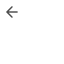

In [115]:
await page.content()

In [ ]:
import asyncio
from bs4 import BeautifulSoup
from playwright.async_api import async_playwright
import time

headlines = []
time_stamps = []

async def collect_headlines_and_timestamps(page,soup):
    await page.wait_for_selector("div.search-result-content")
    html = await page.content()
    soup = BeautifulSoup(html, "html.parser")
    result_divs = soup.find_all("div", class_="search-result-content")
    for result_div in result_divs:
        headline = result_div.find('a')
        headline_text = headline.text
        headlines.append(headline_text)
    
    for result_div in result_divs:
        time_stamp = result_div.find('h5')
        time_stamp_text = time_stamp.text
        time_stamps.append(time_stamp_text)

async def main():
    # Create a Playwright instance
    async with async_playwright() as playwright:
        # Start a browser
        browser = playwright.chromium
        # Create a new page
        page = await browser.new_page()
        
        await page.wait_for_selector("div.search-result-content")
        html = await page.content()
        soup = BeautifulSoup(html, "html.parser") 
        await collect_headlines_and_timestamps(page,soup)
        
while True:
    load_more_button = page.locator("div.search-result-more-txt")
    try:
        await load_more_button.click()
        await page.wait_for_selector("div.search-result-content")
        time.sleep(1)
        html = await page.content()
        soup = BeautifulSoup(html, "html.parser") 
        await collect_headlines_and_timestamps(page,soup)
        
#         no_more_results = page.select_one("div.search-result-more-txt.search-result-no-more")
#         if no_more_results is not None:
#             break
    except:
        break

async def main():
    # Create a Playwright instance
    async with async_playwright() as playwright:
        # Start a browser
        browser = playwright.chromium
        # Create a new page
        page = await browser.new_page()
        
        html = await page.content()
        soup = BeautifulSoup(html, "html.parser")
        await collect_headlines_and_timestamps(page,soup)

print(headlines)
print(time_stamps)

In [ ]:
# Find all the div tags with a class attribute of "search-result-excerpt"
result_divs = soup.find_all("div", class_="search-result-excerpt")

# Initialize an empty list to store the headlines
all_content = []

# Loop through the list of divs
for result_div in result_divs:
  # Extract the text content of the div
  everything_text = result_div.text
  # Add the text content to the list
  all_content.append(everything_text)

# Print the list of text content
print(all_content)


In [117]:
import asyncio
from bs4 import BeautifulSoup
from playwright.async_api import async_playwright
import time

headlines = []
time_stamps = []
all_content = []

async def collect_headlines_and_timestamps(page,soup):
    await page.wait_for_selector("div.search-result-content")
    html = await page.content()
    soup = BeautifulSoup(html, "html.parser")
    result_divs = soup.find_all("div", class_="search-result-content")
    for result_div in result_divs:
        headline = result_div.find('a')
        headline_text = headline.text
        headlines.append(headline_text)
    
    for result_div in result_divs:
        time_stamp = result_div.find('h5')
        time_stamp_text = time_stamp.text
        time_stamps.append(time_stamp_text)
        
    result_divs = soup.find_all("div", class_="search-result-excerpt")
    for result_div in result_divs:
        everything_text = result_div.text
        all_content.append(everything_text)

async def main():
    # Create a Playwright instance
    async with async_playwright() as playwright:
        # Start a browser
        browser = playwright.chromium
        # Create a new page
#         page = await browser.new_page()
        
        await page.wait_for_selector("div.search-result-content")
        html = await page.content()
        soup = BeautifulSoup(html, "html.parser") 
        await collect_headlines_and_timestamps(page,soup)
        
        while True:
            load_more_button = page.locator("div.search-result-more-txt")
            try:
                await load_more_button.click()
                await page.wait_for_selector("div.search-result-content")
                time.sleep(1)
                html = await page.content()
                soup = BeautifulSoup(html, "html.parser") 
                await collect_headlines_and_timestamps(page,soup)
            except:
                break

await main()

print(headlines)
print(time_stamps)
print(all_content)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [118]:
headlines

['Exclusive-To tap U.S. government billions, Tesla must unlock EV chargers',
 'EXCLUSIVE-To tap U.S. government billions, Tesla must unlock EV chargers',
 'Factbox-CCS? CHAdeMO? EV charger terms you need to know',
 'FACTBOX- CCS? CHAdeMO? EV charger terms you need to know ',
 'Investor Gerber to run for Tesla board, cites PR and service issues',
 'EXCLUSIVE- To tap U.S. government billions, Tesla must unlock EV chargers\xa0',
 'US STOCKS-Nasdaq edges lower, Lyft sinks on dour outlook',
 'US STOCKS-Wall St eyes lower open; Lyft sinks on dour outlook',
 'US STOCKS-Futures fall amid rising yields; Lyft sinks on dour profit outlook',
 'Gigapresses - the giant die casts reshaping car manufacturing',
 'Exclusive-To tap U.S. government billions, Tesla must unlock EV chargers',
 'EXCLUSIVE-To tap U.S. government billions, Tesla must unlock EV chargers',
 'Factbox-CCS? CHAdeMO? EV charger terms you need to know',
 'FACTBOX- CCS? CHAdeMO? EV charger terms you need to know ',
 'Investor Gerber to

In [119]:
len(headlines)

743050

In [120]:
len(time_stamps)

743050

In [121]:
len(all_content)

743050

In [122]:
last_value = time_stamps[-1]
print(last_value)


April 20, 2022 12:16pm EDT


In [123]:
last_value = headlines[-1]
print(last_value)

Musk’s Twitter tilt comes at bad time for Tesla


In [124]:
last_value = all_content[-1]
print(last_value)

... for Twitter comes as his crown jewel, electric-vehicle kingpin Tesla... the microblogging site is a risky distraction.
Tesla shareholders are accustomed...


In [125]:
import pandas as pd

# Create a dataframe from the lists
df = pd.DataFrame({'headlines': headlines,'all_content': all_content, 'time_stamps': time_stamps})

# Print the dataframe
print(df)

                                                                                         headlines  \
0                         Exclusive-To tap U.S. government billions, Tesla must unlock EV chargers   
1                         EXCLUSIVE-To tap U.S. government billions, Tesla must unlock EV chargers   
2                                          Factbox-CCS? CHAdeMO? EV charger terms you need to know   
3                                        FACTBOX- CCS? CHAdeMO? EV charger terms you need to know    
4                              Investor Gerber to run for Tesla board, cites PR and service issues   
...                                                                                            ...   
743045                 US STOCKS-Nasdaq slumps as bleak Netflix earnings ripple through tech names   
743046                     Musk tweets cryptic phrase days after Twitter takeover offer (April 19)   
743047  CORRECTED-UPDATE 3-Musk tweets cryptic phrase days after Twitter takeover 

In [126]:
df

,headlines,all_content,time_stamps
0,"Exclusive-To tap U.S. government billions, Tesla must unlock EV chargers",...By Jarrett Renshaw and Hyunjoo Jin\n(Reuters) -Tesla CEO Elon Musk has... that will pressure Tesla to expand beyond its proprietary charging equipment...,"February 10, 2023 06:33pm EST"
1,"EXCLUSIVE-To tap U.S. government billions, Tesla must unlock EV chargers",... and Hyunjoo Jin\nFeb 10 (Reuters) - Tesla CEO Elon Musk has often talked\nabout... is expected to\nfinalize a requirement that will pressure Tesla to expand...,"February 10, 2023 06:30pm EST"
2,Factbox-CCS? CHAdeMO? EV charger terms you need to know,"... AND CHAdeMO\nThere are three types of DC fast charging systems - Tesla, SAE...,” was designed by carmakers primarily in Japan. \nSUPERCHARGERS\nSince 2012, Tesla...","February 10, 2023 05:30pm EST"
3,FACTBOX- CCS? CHAdeMO? EV charger terms you need to know,"... AND CHAdeMO\nThere are three types of DC fast charging systems - Tesla,\nSAE...,” was designed by carmakers primarily in\nJapan.\nSUPERCHARGERS\nSince 2012, Tesla...","February 10, 2023 05:25pm EST"
4,"Investor Gerber to run for Tesla board, cites PR and service issues","...By Ross Kerber\n(Reuters) - Well-known Tesla Inc investor Ross... a ""friendly activist"" by Tesla CEO Elon Musk, but that the company needs more...","February 10, 2023 03:05pm EST"
...,...,...,...
743045,US STOCKS-Nasdaq slumps as bleak Netflix earnings ripple through tech names,... was dropping mask mandate on\npublic transportation.\nTesla Inc fell 3.9...,"April 20, 2022 02:21pm EDT"
743046,Musk tweets cryptic phrase days after Twitter takeover offer (April 19),... is also the chief executive of electric-vehicle maker Tesla Inc... declined to comment. Tesla did not immediately respond to a Reuters request...,"April 20, 2022 01:23pm EDT"
743047,CORRECTED-UPDATE 3-Musk tweets cryptic phrase days after Twitter takeover offer (April 19),"...\nmaker Tesla Inc, on Saturday tweeted ""Love Me Tender"",\nan Elvis... Post report.\nTwitter declined to comment. Tesla did not immediately...","April 20, 2022 01:05pm EDT"
743048,US STOCKS-Nasdaq slides after bleak Netflix results,"... 4.6% and 6%, while\nmegacap stocks such as Amazon.com Inc, Tesla Inc....\nTesla Inc fell 4.4% ahead of its first-quarter\nresults after...","April 20, 2022 12:46pm EDT"


In [131]:
df.head(10000)

,headlines,all_content,time_stamps
0,"Exclusive-To tap U.S. government billions, Tesla must unlock EV chargers",...By Jarrett Renshaw and Hyunjoo Jin\n(Reuters) -Tesla CEO Elon Musk has... that will pressure Tesla to expand beyond its proprietary charging equipment...,"February 10, 2023 06:33pm EST"
1,"EXCLUSIVE-To tap U.S. government billions, Tesla must unlock EV chargers",... and Hyunjoo Jin\nFeb 10 (Reuters) - Tesla CEO Elon Musk has often talked\nabout... is expected to\nfinalize a requirement that will pressure Tesla to expand...,"February 10, 2023 06:30pm EST"
2,Factbox-CCS? CHAdeMO? EV charger terms you need to know,"... AND CHAdeMO\nThere are three types of DC fast charging systems - Tesla, SAE...,” was designed by carmakers primarily in Japan. \nSUPERCHARGERS\nSince 2012, Tesla...","February 10, 2023 05:30pm EST"
3,FACTBOX- CCS? CHAdeMO? EV charger terms you need to know,"... AND CHAdeMO\nThere are three types of DC fast charging systems - Tesla,\nSAE...,” was designed by carmakers primarily in\nJapan.\nSUPERCHARGERS\nSince 2012, Tesla...","February 10, 2023 05:25pm EST"
4,"Investor Gerber to run for Tesla board, cites PR and service issues","...By Ross Kerber\n(Reuters) - Well-known Tesla Inc investor Ross... a ""friendly activist"" by Tesla CEO Elon Musk, but that the company needs more...","February 10, 2023 03:05pm EST"
...,...,...,...
9995,Securities fraud trial over Elon Musk's 2018 tweets draws to a close,...By Jody Godoy\nFeb 3 (Reuters) - A lawyer for Tesla Inc\nshareholders... will decide whether the tweet artificially\ninflated Tesla's share price...,"February 03, 2023 06:00am EST"
9996,EXCLUSIVE-China eyes help for shell-shocked consumers but big stimulus unlikely-sources,"...(Adds Tesla's China sales jump)\nBy Kevin Yao\nBEIJING, Feb 3 (Reuters... yuan last year to 17.8\ntrillion yuan.\nTesla Inc said on Friday that its...","February 03, 2023 05:01am EST"
9997,Tesla sales of China-made electric vehicles up 18% in January,"...BEIJING (Reuters) - Tesla Inc sold 66,051 China-made electric... January last year. \nTesla's Shanghai plant in December cut output...","February 03, 2023 04:27am EST"
9998,UPDATE 1-Tesla sales of China-made electric vehicles up 18% in January,"...(Adds details)\nBEIJING, Feb 3 (Reuters) - Tesla Inc sold\n66,051 China..., and 10% higher versus\nJanuary last year.\nTesla's Shanghai plant in December...","February 03, 2023 04:23am EST"


In [132]:
df_filtered = df[df['time_stamps'].str.contains("November 10, 2022")]

In [133]:
df_filtered 

,headlines,all_content,time_stamps
66696,US STOCKS-Wall St soars as cooling inflation spurs bets of smaller rate hikes,"... heavyweights including Tesla Inc, Microsoft\nCorp, Apple Inc, Amazon.com Inc...","November 10, 2022 11:11am EST"
66697,US STOCKS-Nasdaq soars as cooling inflation spurs bets of smaller rate hikes,"... technology stocks rallied, with Tesla Inc\n, Microsoft Corp, Apple Inc...","November 10, 2022 10:13am EST"
66698,US STOCKS-Wall St set to open higher as inflation data spurs bets of smaller rate hikes,"... Inc, Amazon.com Inc, Meta\nPlatforms Inc, Tesla Inc and Nvidia Corp\nup...","November 10, 2022 09:07am EST"
66699,Analysis-Separation anxiety over Renault's five-way split,"... cars, Renault has fallen behind newer, more agile rivals such as Tesla...","November 10, 2022 07:57am EST"
67846,US STOCKS-Wall St soars as cooling inflation spurs bets of smaller rate hikes,"... heavyweights including Tesla Inc, Microsoft\nCorp, Apple Inc, Amazon.com Inc...","November 10, 2022 11:11am EST"
...,...,...,...
740351,UPDATE 1-Musk's first email to Twitter staff ends remote work - Bloomberg News,"... at his other companies, SpaceX\nand Tesla Inc, where he told employees...","November 10, 2022 06:40am EST"
740352,"Chinese EV maker Nio posts bigger quarterly loss, sees higher deliveries","... Tesla Inc.\nNio expects deliveries of its vehicles, which include hybrids...","November 10, 2022 05:27am EST"
740353,"UPDATE 1-Chinese EV maker Nio posts bigger quarterly loss, sees higher deliveries",... rivals to home-grown BYD Co and\nU.S.-based Tesla Inc.\nNio expects...,"November 10, 2022 05:27am EST"
740354,UPDATE 2-China auto sales rise at slowest pace in five months in Oct - industry body,"...\n--increased 81.7% in the month, the slowest pace in six months.\nTesla added...","November 10, 2022 03:38am EST"


In [134]:
print(df.shape)
rows, columns = df.shape
df.iloc[:rows, :columns]


(743050, 3)


,headlines,all_content,time_stamps
0,"Exclusive-To tap U.S. government billions, Tesla must unlock EV chargers",...By Jarrett Renshaw and Hyunjoo Jin\n(Reuters) -Tesla CEO Elon Musk has... that will pressure Tesla to expand beyond its proprietary charging equipment...,"February 10, 2023 06:33pm EST"
1,"EXCLUSIVE-To tap U.S. government billions, Tesla must unlock EV chargers",... and Hyunjoo Jin\nFeb 10 (Reuters) - Tesla CEO Elon Musk has often talked\nabout... is expected to\nfinalize a requirement that will pressure Tesla to expand...,"February 10, 2023 06:30pm EST"
2,Factbox-CCS? CHAdeMO? EV charger terms you need to know,"... AND CHAdeMO\nThere are three types of DC fast charging systems - Tesla, SAE...,” was designed by carmakers primarily in Japan. \nSUPERCHARGERS\nSince 2012, Tesla...","February 10, 2023 05:30pm EST"
3,FACTBOX- CCS? CHAdeMO? EV charger terms you need to know,"... AND CHAdeMO\nThere are three types of DC fast charging systems - Tesla,\nSAE...,” was designed by carmakers primarily in\nJapan.\nSUPERCHARGERS\nSince 2012, Tesla...","February 10, 2023 05:25pm EST"
4,"Investor Gerber to run for Tesla board, cites PR and service issues","...By Ross Kerber\n(Reuters) - Well-known Tesla Inc investor Ross... a ""friendly activist"" by Tesla CEO Elon Musk, but that the company needs more...","February 10, 2023 03:05pm EST"
...,...,...,...
743045,US STOCKS-Nasdaq slumps as bleak Netflix earnings ripple through tech names,... was dropping mask mandate on\npublic transportation.\nTesla Inc fell 3.9...,"April 20, 2022 02:21pm EDT"
743046,Musk tweets cryptic phrase days after Twitter takeover offer (April 19),... is also the chief executive of electric-vehicle maker Tesla Inc... declined to comment. Tesla did not immediately respond to a Reuters request...,"April 20, 2022 01:23pm EDT"
743047,CORRECTED-UPDATE 3-Musk tweets cryptic phrase days after Twitter takeover offer (April 19),"...\nmaker Tesla Inc, on Saturday tweeted ""Love Me Tender"",\nan Elvis... Post report.\nTwitter declined to comment. Tesla did not immediately...","April 20, 2022 01:05pm EDT"
743048,US STOCKS-Nasdaq slides after bleak Netflix results,"... 4.6% and 6%, while\nmegacap stocks such as Amazon.com Inc, Tesla Inc....\nTesla Inc fell 4.4% ahead of its first-quarter\nresults after...","April 20, 2022 12:46pm EDT"


In [137]:
df.to_csv("reuters_tesla.csv")

In [2]:
import pandas as pd
df = pd.read_csv("reuters_tesla.csv")

In [3]:
df

,Unnamed: 0,headlines,all_content,time_stamps
0,0,"Exclusive-To tap U.S. government billions, Tes...",...By Jarrett Renshaw and Hyunjoo Jin\n(Reuter...,"February 10, 2023 06:33pm EST"
1,1,"EXCLUSIVE-To tap U.S. government billions, Tes...",... and Hyunjoo Jin\nFeb 10 (Reuters) - Tesla ...,"February 10, 2023 06:30pm EST"
2,2,Factbox-CCS? CHAdeMO? EV charger terms you nee...,... AND CHAdeMO\nThere are three types of DC f...,"February 10, 2023 05:30pm EST"
3,3,FACTBOX- CCS? CHAdeMO? EV charger terms you ne...,... AND CHAdeMO\nThere are three types of DC f...,"February 10, 2023 05:25pm EST"
4,4,"Investor Gerber to run for Tesla board, cites ...",...By Ross Kerber\n(Reuters) - Well-known ...,"February 10, 2023 03:05pm EST"
...,...,...,...,...
743045,743045,US STOCKS-Nasdaq slumps as bleak Netflix earni...,... was dropping mask mandate on\npublic trans...,"April 20, 2022 02:21pm EDT"
743046,743046,Musk tweets cryptic phrase days after Twitter ...,... is also the chief executive of electric-ve...,"April 20, 2022 01:23pm EDT"
743047,743047,CORRECTED-UPDATE 3-Musk tweets cryptic phrase ...,"...\nmaker Tesla Inc, on Saturday tweeted ""Lov...","April 20, 2022 01:05pm EDT"
743048,743048,US STOCKS-Nasdaq slides after bleak Netflix re...,"... 4.6% and 6%, while\nmegacap stocks such as...","April 20, 2022 12:46pm EDT"


In [4]:
duplicates = df[df.duplicated()]
num_duplicates = len(duplicates)
print("Number of duplicate values: ", num_duplicates)


Number of duplicate values:  0
